In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Updated_theta.csv')
df = data.copy()
df.head()

,Goal Levels,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,5ace20379fe7b01d5806bec9,-0.29,-0.30,-0.95,-0.96,-0.97,-0.98,-0.99,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37
1,5ace20379fe7b01d5806bebb,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.34,-2.35,-2.36,-2.37,-2.39,-2.41
2,5ace203f9fe7b01d5806c144,0.27,0.26,-0.22,-0.62,-0.81,-0.82,-1.12,-1.28,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05
3,5ace203f9fe7b01d5806c145,1.46,1.45,0.90,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72
4,5ace203d9fe7b01d5806c082,3.85,2.27,-0.30,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.40,-0.41


In [6]:
#dropping goal levels to make DF of only numeric columns
d = df.drop('Goal Levels',axis = 1).iloc[0:10]

In [7]:
from sklearn.cluster import KMeans

### Elbow Method

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

C:\Users\jaych\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


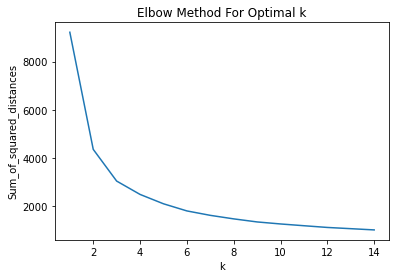

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Elbow graph bends from k=3,so we'll take 3 clusters

In [9]:
kmeans = KMeans(n_clusters = 3)

In [10]:
d = df.drop('Goal Levels',axis = 1)

In [12]:
kmeans.fit(d)

KMeans(n_clusters=3)

In [13]:
kmeans.cluster_centers_

array([[ 2.10003937,  1.15834646,  0.69106299,  0.60610236,  0.41685039,
         0.27003937,  0.09      , -0.06535433, -0.14755906, -0.36759843,
        -0.53472441, -0.64429134, -0.70685039, -0.75417323, -0.78559055],
       [ 2.94216418,  2.32104478,  1.93947761,  1.84044776,  1.62679104,
         1.49776119,  1.29955224,  1.16283582,  1.08104478,  0.8758209 ,
         0.70134328,  0.5738806 ,  0.49776119,  0.445     ,  0.40858209],
       [ 0.5137037 , -0.21302469, -0.57018519, -0.71154321, -0.83901235,
        -0.95716049, -1.08783951, -1.1991358 , -1.2645679 , -1.44283951,
        -1.56635802, -1.64055556, -1.68351852, -1.71530864, -1.74061728]])

In [14]:
cluster_grp = kmeans.labels_
cluster_grp

array([2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0,
       2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2,
       0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0,

In [15]:
dict = {'Cluster_grp':cluster_grp}
cluster = pd.DataFrame(dict)
cluster.head()

,Cluster_grp
0,2
1,2
2,2
3,0
4,0


In [16]:
#Joining cluster group DF to our DF
df2 = d.join(cluster)
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,Cluster_grp
0,-0.29,-0.30,-0.95,-0.96,-0.97,-0.98,-0.99,-1.00,-1.08,-1.12,-1.24,-1.29,-1.31,-1.35,-1.37,2
1,1.23,0.91,-0.51,-0.77,-1.49,-1.99,-2.19,-2.24,-2.31,-2.34,-2.35,-2.36,-2.37,-2.39,-2.41,2
2,0.27,0.26,-0.22,-0.62,-0.81,-0.82,-1.12,-1.28,-1.29,-1.58,-1.75,-1.88,-1.96,-2.02,-2.05,2
3,1.46,1.45,0.90,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72,0
4,3.85,2.27,-0.30,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.40,-0.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,1.46,1.45,0.90,0.89,0.81,0.51,0.22,0.03,0.02,-0.19,-0.39,-0.55,-0.64,-0.70,-0.72,0
546,3.85,2.27,-0.30,-0.30,-0.31,-0.32,-0.33,-0.34,-0.35,-0.36,-0.37,-0.38,-0.39,-0.40,-0.41,0
547,1.25,1.24,1.23,1.22,0.80,0.68,0.65,0.40,0.33,0.08,0.01,-0.12,-0.17,-0.23,-0.27,0
548,0.10,0.09,0.08,0.07,0.06,0.05,0.04,-0.29,-0.33,-0.56,-0.67,-0.75,-0.83,-0.88,-0.90,0


In [17]:
#Extracting mean of each cluster group
cluster_grp_mean = df2.groupby('Cluster_grp').mean().T
cluster_grp_mean

Cluster_grp,0,1,2
x1,2.100039,2.942164,0.513704
x2,1.158346,2.321045,-0.213025
x3,0.691063,1.939478,-0.570185
x4,0.606102,1.840448,-0.711543
x5,0.416850,1.626791,-0.839012
x6,0.270039,1.497761,-0.957160
x7,0.090000,1.299552,-1.087840
x8,-0.065354,1.162836,-1.199136
x9,-0.147559,1.081045,-1.264568
x10,-0.367598,0.875821,-1.442840


In [18]:
#Dividing data to X and y
X = np.arange(1,16,1).reshape(15,1)
y = cluster_grp_mean[1].values.reshape(15,1)
y

array([[2.94216418],
       [2.32104478],
       [1.93947761],
       [1.84044776],
       [1.62679104],
       [1.49776119],
       [1.29955224],
       [1.16283582],
       [1.08104478],
       [0.8758209 ],
       [0.70134328],
       [0.5738806 ],
       [0.49776119],
       [0.445     ],
       [0.40858209]])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Fitting Linear Regression

In [20]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

### Fitting Polynomial Regression

In [61]:
poly = PolynomialFeatures(degree = 4)
x_poly = poly.fit_transform(X)

#poly.fit(x_poly,y)
lm2 = LinearRegression()
lm2.fit(x_poly, y)

LinearRegression()

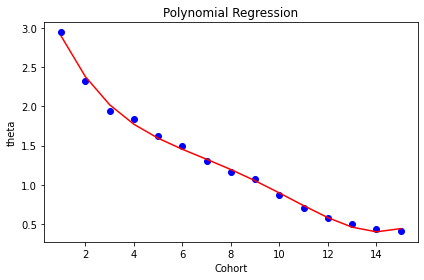

In [50]:
plt.scatter(X,y,color='b')
plt.plot(X , lm2.predict(poly.fit_transform(X)),color = 'r')
plt.title('Polynomial Regression')
plt.xlabel('Cohort')
plt.ylabel('theta')
plt.tight_layout()

In [33]:
def cluster(cluster_no,degree):
    X = np.arange(1,16,1).reshape(15,1)
    y = cluster_grp_mean[cluster_no].values.reshape(15,1)

    lm = LinearRegression()
    lm.fit(X,y)

    poly = PolynomialFeatures(degree = degree)
    x_poly = poly.fit_transform(X)

    poly.fit(x_poly,y)
    lm2 = LinearRegression()
    lm2.fit(x_poly, y)

    plt.scatter(X,y,color='b')
    plt.plot(X , lm2.predict(poly.fit_transform(X)),color = 'r')
    plt.title('Polynomial Regression')
    plt.xlabel('Cohort')
    plt.ylabel('theta')
    plt.tight_layout()
    

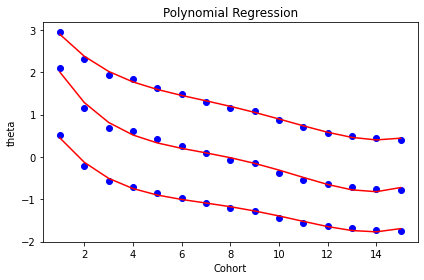

In [70]:
cluster(0,4)
cluster(1,4)
cluster(2,4)

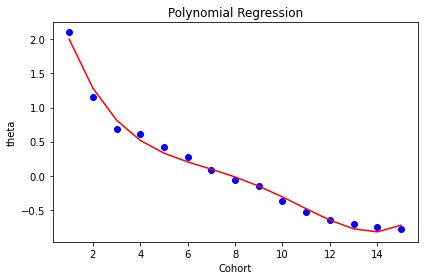

In [71]:
cluster(0,4)

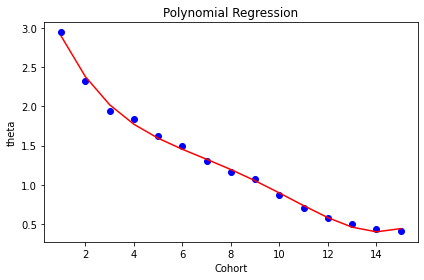

In [66]:
cluster(1,4)

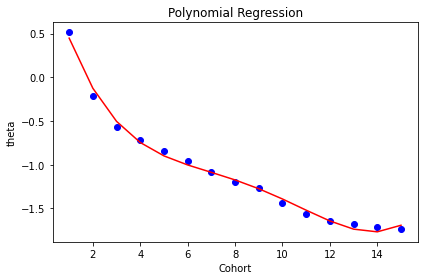

In [67]:
cluster(2,4)